1
Warehouse_id
Product warehouse_id
2
WH_Manager_ID    
Employee ID of warehouse manager 
3
Location_type    
Location of warehouse-like in city or village
4
WH_capacity_size
Storage capacity size of the warehouse
5
Zone 
Zone of the warehouse
6
WH_regional_zone      
Regional zone of the warehouse under each zone
7
num_refill_req_l3m   
Number of times refilling has been done in last 3 months
8
transport_issue_l1y
Any transport issue like accident or goods stolen reported in last one
9
Competitor_in_mkt      
Number of instant noodles competitors in the market
10
retail_shop_num     
Number of the retail shop that sell the product under the warehouse area
11
wh_owner_type
Company is owning the warehouse or they have got the  warehouse on rent
12
distributor_num   
The number of distributer works in between warehouse and retail shops. 
13
flood_impacted     
Warehouse is in the Flood impacted area indicator.
14
Flood_proof
Warehouse is a flood-proof indicator.  Like storage is at some height not flood_proof  
15
electric_supply
Warehouse have electric back up like generator, so they can run the warehouse in load shedding
16
dist_from_hub            
Distance between warehouse to the production hub in Kms
17
 workers_num        
Number of workers working in the warehouse
18
wh_est_year 
 Warehouse established year
19
storage_issue_reported_l3m
Warehouse reported storage issue to corporate office in last 3 months. Like rat, fungus because of moisture etc.
20
temp_reg_mach    
Warehouse have temperature regulating machine indicator
21
approved_wh_govt_certificate
What kind of standard certificate has been issued to the warehouse from government regulatory body
22
 wh_breakdown_l3m 
Number of time warehouse face a breakdown in last 3 months. Like strike from worker, flood, or electrical failure
23
govt_check_l3m
Number of time government Officers have been visited the warehouse to check the quality and expire of stored food in last 3 months
24
product_wg_ton(Target_column)
 Product has been shipped in last 3 months. Weight is in tons


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
supply_df = pd.read_csv(r'D:\only projects\Machine learning projects\New folder\Dataset.csv')
supply_df

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6                   3                    1   
1               Zone 5                   0                    0   
2               Zone 2                   1                    0   
3               Zone 3                   7                    4   
4               Zone 5                   3                    1   
...                ...                 ...                  ...   
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                      2             4651         Rented               24   
1                      4             6217  Company Owned               47   
2                      4             4306  Company Owned               64   
3                      2             6000         Rented               50   
4                      2             4740  Company Owned               42   
...                  ...              ...            ...              ...   
24995                  4             5390         Rented               19   
24996                  4             4490  Company Owned               57   
24997                  2             5403         Rented               31   
24998                  2            10562         Rented               25   
24999                  4             5664  Company Owned               21   

       flood_impacted  flood_proof  electric_supply  dist_from_hub  \
0                   0            1                1             91   
1                   0            0                1            210   
2                   0            0                0            161   
3                   0            0                0            103   
4                   1            0                1            112   
...               ...          ...              ...            ...   
24995               0            0                1            142   
24996               0            0                1            130   
24997               1            0                1            147   
24998               0            0                1             60   
24999               0            1                1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0             29.0          NaN                          13              0   
1             31.0          NaN                           4              0   
2             37.0          NaN                          17              0   
3             21.0          NaN                          17              1   
4             25.0       2009.0                          18              0   
...            ...          ...                         ...       

In [4]:
new_supply_df = supply_df.copy()

In [5]:
new_supply_df

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6                   3                    1   
1               Zone 5                   0                    0   
2               Zone 2                   1                    0   
3               Zone 3                   7                    4   
4               Zone 5                   3                    1   
...                ...                 ...                  ...   
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                      2             4651         Rented               24   
1                      4             6217  Company Owned               47   
2                      4             4306  Company Owned               64   
3                      2             6000         Rented               50   
4                      2             4740  Company Owned               42   
...                  ...              ...            ...              ...   
24995                  4             5390         Rented               19   
24996                  4             4490  Company Owned               57   
24997                  2             5403         Rented               31   
24998                  2            10562         Rented               25   
24999                  4             5664  Company Owned               21   

       flood_impacted  flood_proof  electric_supply  dist_from_hub  \
0                   0            1                1             91   
1                   0            0                1            210   
2                   0            0                0            161   
3                   0            0                0            103   
4                   1            0                1            112   
...               ...          ...              ...            ...   
24995               0            0                1            142   
24996               0            0                1            130   
24997               1            0                1            147   
24998               0            0                1             60   
24999               0            1                1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0             29.0          NaN                          13              0   
1             31.0          NaN                           4              0   
2             37.0          NaN                          17              0   
3             21.0          NaN                          17              1   
4             25.0       2009.0                          18              0   
...            ...          ...                         ...       

In [6]:
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [7]:
supply_df.isna().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [8]:
(supply_df.isnull().sum() / len(supply_df)) * 100


Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [9]:
# we drop column wh_est_year because is the missing value is more than 10%
supply_df.drop(['wh_est_year'],axis=1,inplace=True)


In [10]:
# now we impute the remaning columns which have null % less than 10%
def impute_null_values(df):
    # Impute mean for numeric columns
    df_numeric = df.select_dtypes(include=['number'])
    df[df_numeric.columns] = df_numeric.apply(lambda col: col.fillna(col.mean()))

    # Impute mode for categorical columns
    df_categorical = df.select_dtypes(exclude=['number'])
    df[df_categorical.columns] = df_categorical.apply(lambda col: col.fillna(col.mode()[0]))

    return df

supply_df= impute_null_values(supply_df)

In [11]:
supply_df.sum().duplicated().any()

False

In [12]:
supply_df.isna().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [13]:


def detect_outliers_iqr(data, multiplier=1.5):
    """
    Detect outliers in a DataFrame using the IQR (Interquartile Range) method.

    Parameters:
    - data: DataFrame
        Input DataFrame with numerical columns.
    - multiplier: float, optional
        Multiplier for defining the IQR threshold. Default is 1.5.

    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
    return data[outliers]


# Detecting outliers in the DataFrame using IQR method
outliers_df_iqr = detect_outliers_iqr(supply_df)

# Displaying the outliers
#print("Outliers (IQR method):")
outliers_df_iqr.count()


# this code gives the total count of outliers which are present in the dataset

Ware_house_ID                   7279
WH_Manager_ID                   7279
Location_type                   7279
WH_capacity_size                7279
zone                            7279
WH_regional_zone                7279
num_refill_req_l3m              7279
transport_issue_l1y             7279
Competitor_in_mkt               7279
retail_shop_num                 7279
wh_owner_type                   7279
distributor_num                 7279
flood_impacted                  7279
flood_proof                     7279
electric_supply                 7279
dist_from_hub                   7279
workers_num                     7279
storage_issue_reported_l3m      7279
temp_reg_mach                   7279
approved_wh_govt_certificate    7279
wh_breakdown_l3m                7279
govt_check_l3m                  7279
product_wg_ton                  7279
dtype: int64

In [14]:
outliers_df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7279 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 7279 non-null   object 
 1   WH_Manager_ID                 7279 non-null   object 
 2   Location_type                 7279 non-null   object 
 3   WH_capacity_size              7279 non-null   object 
 4   zone                          7279 non-null   object 
 5   WH_regional_zone              7279 non-null   object 
 6   num_refill_req_l3m            7279 non-null   int64  
 7   transport_issue_l1y           7279 non-null   int64  
 8   Competitor_in_mkt             7279 non-null   int64  
 9   retail_shop_num               7279 non-null   int64  
 10  wh_owner_type                 7279 non-null   object 
 11  distributor_num               7279 non-null   int64  
 12  flood_impacted                7279 non-null   int64  
 13  fl

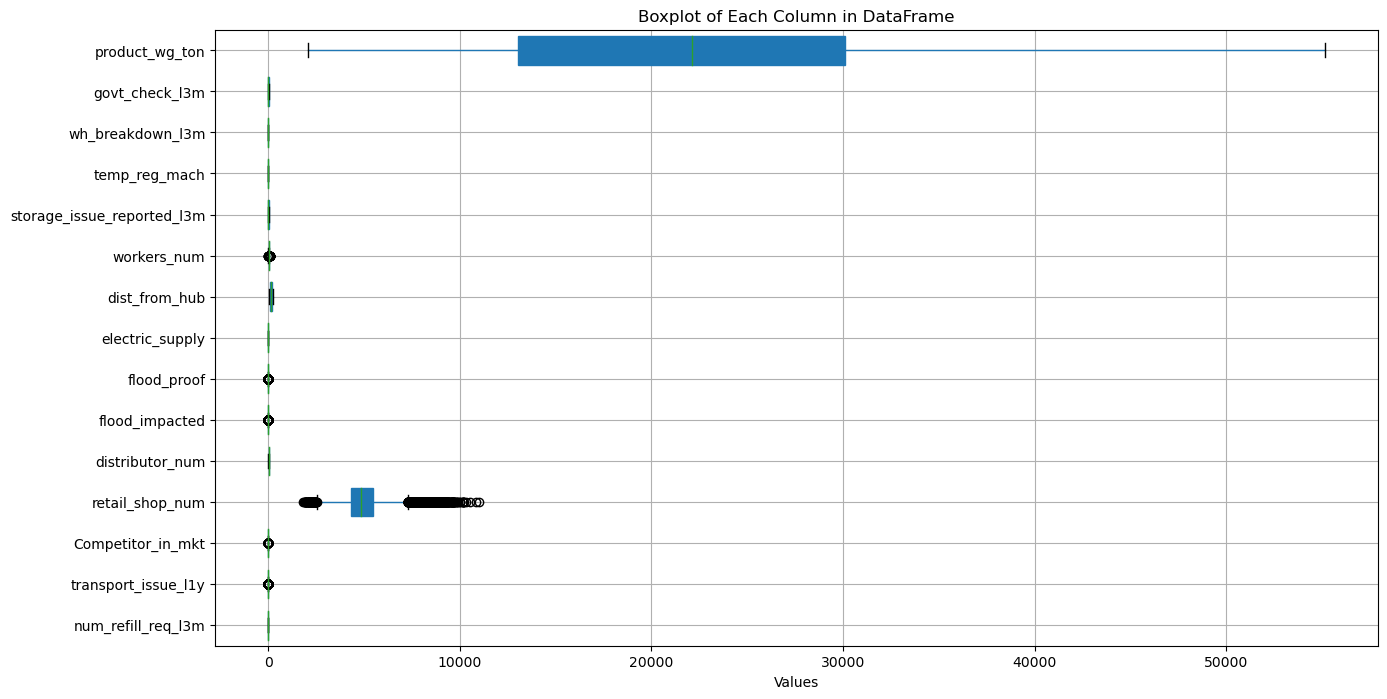

In [15]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Create boxplot for each column
boxplot = supply_df.boxplot(sym='o', vert=False, patch_artist=True, widths=0.7)
plt.title('Boxplot of Each Column in DataFrame')
plt.xlabel('Values')

# Show the plot
plt.show()



In [16]:
def impute_outliers(df, multiplier=1.5):
    df_imputed = df.copy()
    
    for column in df.columns:
        # Skip non-numeric columns so we use np.issubdtype
        if not np.issubdtype(df[column].dtype, np.number):
            continue

        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr

        # Replace outliers with the median value
        df_imputed[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                                      df[column].median(),
                                      df[column])
    return df_imputed

# Impute outliers in the DataFrame
df_imputed = impute_outliers(supply_df)

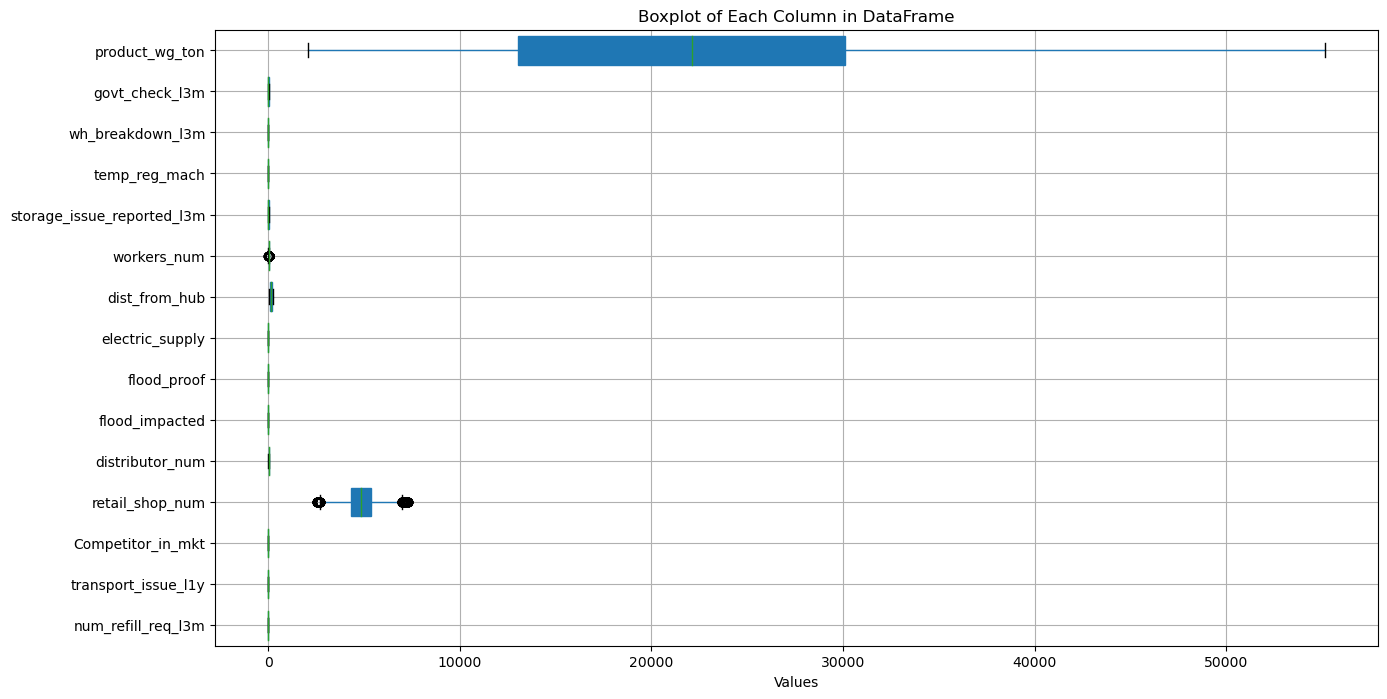

In [17]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Create boxplot for each column
boxplot = df_imputed.boxplot( vert=False, patch_artist=True, widths=0.7)
plt.title('Boxplot of Each Column in DataFrame')
plt.xlabel('Values')

# Show the plot
plt.show()


In [18]:
df_imputed

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6                 3.0                  1.0   
1               Zone 5                 0.0                  0.0   
2               Zone 2                 1.0                  0.0   
3               Zone 3                 7.0                  0.0   
4               Zone 5                 3.0                  1.0   
...                ...                 ...                  ...   
24995           Zone 1                 3.0                  0.0   
24996           Zone 2                 6.0                  0.0   
24997           Zone 5                 7.0                  0.0   
24998           Zone 1                 1.0                  0.0   
24999           Zone 4                 8.0                  2.0   

       Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                    2.0           4651.0         Rented             24.0   
1                    4.0           6217.0  Company Owned             47.0   
2                    4.0           4306.0  Company Owned             64.0   
3                    2.0           6000.0         Rented             50.0   
4                    2.0           4740.0  Company Owned             42.0   
...                  ...              ...            ...              ...   
24995                4.0           5390.0         Rented             19.0   
24996                4.0           4490.0  Company Owned             57.0   
24997                2.0           5403.0         Rented             31.0   
24998                2.0           4859.0         Rented             25.0   
24999                4.0           5664.0  Company Owned             21.0   

       flood_impacted  flood_proof  electric_supply  dist_from_hub  \
0                 0.0          0.0              1.0           91.0   
1                 0.0          0.0              1.0          210.0   
2                 0.0          0.0              0.0          161.0   
3                 0.0          0.0              0.0          103.0   
4                 0.0          0.0              1.0          112.0   
...               ...          ...              ...            ...   
24995             0.0          0.0              1.0          142.0   
24996             0.0          0.0              1.0          130.0   
24997             0.0          0.0              1.0          147.0   
24998             0.0          0.0              1.0           60.0   
24999             0.0          0.0              1.0          239.0   

       workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0        29.000000                        13.0            0.0   
1        31.000000                         4.0            0.0   
2        37.000000                        17.0            0.0   
3        21.000000                        17.0            1.0   
4        25.000000                        18.0            0.0   
...            ...                         ...            ...   
24995    34.000000                        22.0            1.0   
24996    28.00

In [19]:
# we remove the 2 from columns i.e. Ware_house_ID & WH_Manager_ID because ID doesnt impact on overall prediction
df_imputed.drop(['Ware_house_ID','WH_Manager_ID'],axis= 1,inplace=True)

In [20]:
df_imputed

Location_type WH_capacity_size   zone WH_regional_zone  \
0             Urban            Small   West           Zone 6   
1             Rural            Large  North           Zone 5   
2             Rural              Mid  South           Zone 2   
3             Rural              Mid  North           Zone 3   
4             Rural            Large  North           Zone 5   
...             ...              ...    ...              ...   
24995         Rural            Small  North           Zone 1   
24996         Rural              Mid   West           Zone 2   
24997         Urban            Large  South           Zone 5   
24998         Rural            Small  North           Zone 1   
24999         Rural              Mid   West           Zone 4   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                     3.0                  1.0                2.0   
1                     0.0                  0.0                4.0   
2                     1.0                  0.0                4.0   
3                     7.0                  0.0                2.0   
4                     3.0                  1.0                2.0   
...                   ...                  ...                ...   
24995                 3.0                  0.0                4.0   
24996                 6.0                  0.0                4.0   
24997                 7.0                  0.0                2.0   
24998                 1.0                  0.0                2.0   
24999                 8.0                  2.0                4.0   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0               4651.0         Rented             24.0             0.0   
1               6217.0  Company Owned             47.0             0.0   
2               4306.0  Company Owned             64.0             0.0   
3               6000.0         Rented             50.0             0.0   
4               4740.0  Company Owned             42.0             0.0   
...                ...            ...              ...             ...   
24995           5390.0         Rented             19.0             0.0   
24996           4490.0  Company Owned             57.0             0.0   
24997           5403.0         Rented             31.0             0.0   
24998           4859.0         Rented             25.0             0.0   
24999           5664.0  Company Owned             21.0             0.0   

       flood_proof  electric_supply  dist_from_hub  workers_num  \
0              0.0              1.0           91.0    29.000000   
1              0.0              1.0          210.0    31.000000   
2              0.0              0.0          161.0    37.000000   
3              0.0              0.0          103.0    21.000000   
4              0.0              1.0          112.0    25.000000   
...            ...              ...            ...          ...   
24995          0.0              1.0          142.0    34.000000   
24996          0.0              1.0          130.0    28.000000   
24997          0.0              1.0          147.0    28.944398   
24998          0.0              1.0           60.0    25.000000   
24999          0.0              1.0          239.0    39.000000   

       storage_issue_reported_l3m  temp_reg_mach approved_wh_govt_certificate  \
0                            13.0            0.0                            A   
1                             4.0            0.0                            A   
2                            17.0            0.0                            A   
3                            17.0            1.0                           A+   
4                            18.0            0.0                            C   
...                           ...            ...                          ...   
24995                        22.0            1.0                            A   
24996                        10.0            0.0                  

In [21]:
# checking unique values in the dataframe
for i in df_imputed.columns:
    print(f'The unique values in feature {i}',df_imputed[i].unique(),sep='\n')
    print('----------------------------------------------------------')

The unique values in feature Location_type
['Urban' 'Rural']
----------------------------------------------------------
The unique values in feature WH_capacity_size
['Small' 'Large' 'Mid']
----------------------------------------------------------
The unique values in feature zone
['West' 'North' 'South' 'East']
----------------------------------------------------------
The unique values in feature WH_regional_zone
['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
----------------------------------------------------------
The unique values in feature num_refill_req_l3m
[3. 0. 1. 7. 8. 4. 6. 5. 2.]
----------------------------------------------------------
The unique values in feature transport_issue_l1y
[1. 0. 2.]
----------------------------------------------------------
The unique values in feature Competitor_in_mkt
[2. 4. 3. 5. 1. 7. 6. 0.]
----------------------------------------------------------
The unique values in feature retail_shop_num
[4651. 6217. 4306. ... 7200. 2892

In [22]:
# now converting all the categorical values into numerical values using one hot encoding
# create a mapping for each unique category to a numeric value
category_mapping = {'A+': 1, 'A': 2, 'B': 3, 'B+': 4, 'C': 5}

# convert 'Category' column using np.where and the mapping
df_imputed['approved_wh_govt_certificate'] = np.where(df_imputed['approved_wh_govt_certificate'].isin(category_mapping.keys()),
                                 df_imputed['approved_wh_govt_certificate'].map(category_mapping), np.nan)

In [23]:
df_imputed['approved_wh_govt_certificate'].unique()

array([2., 1., 5., 3., 4.])

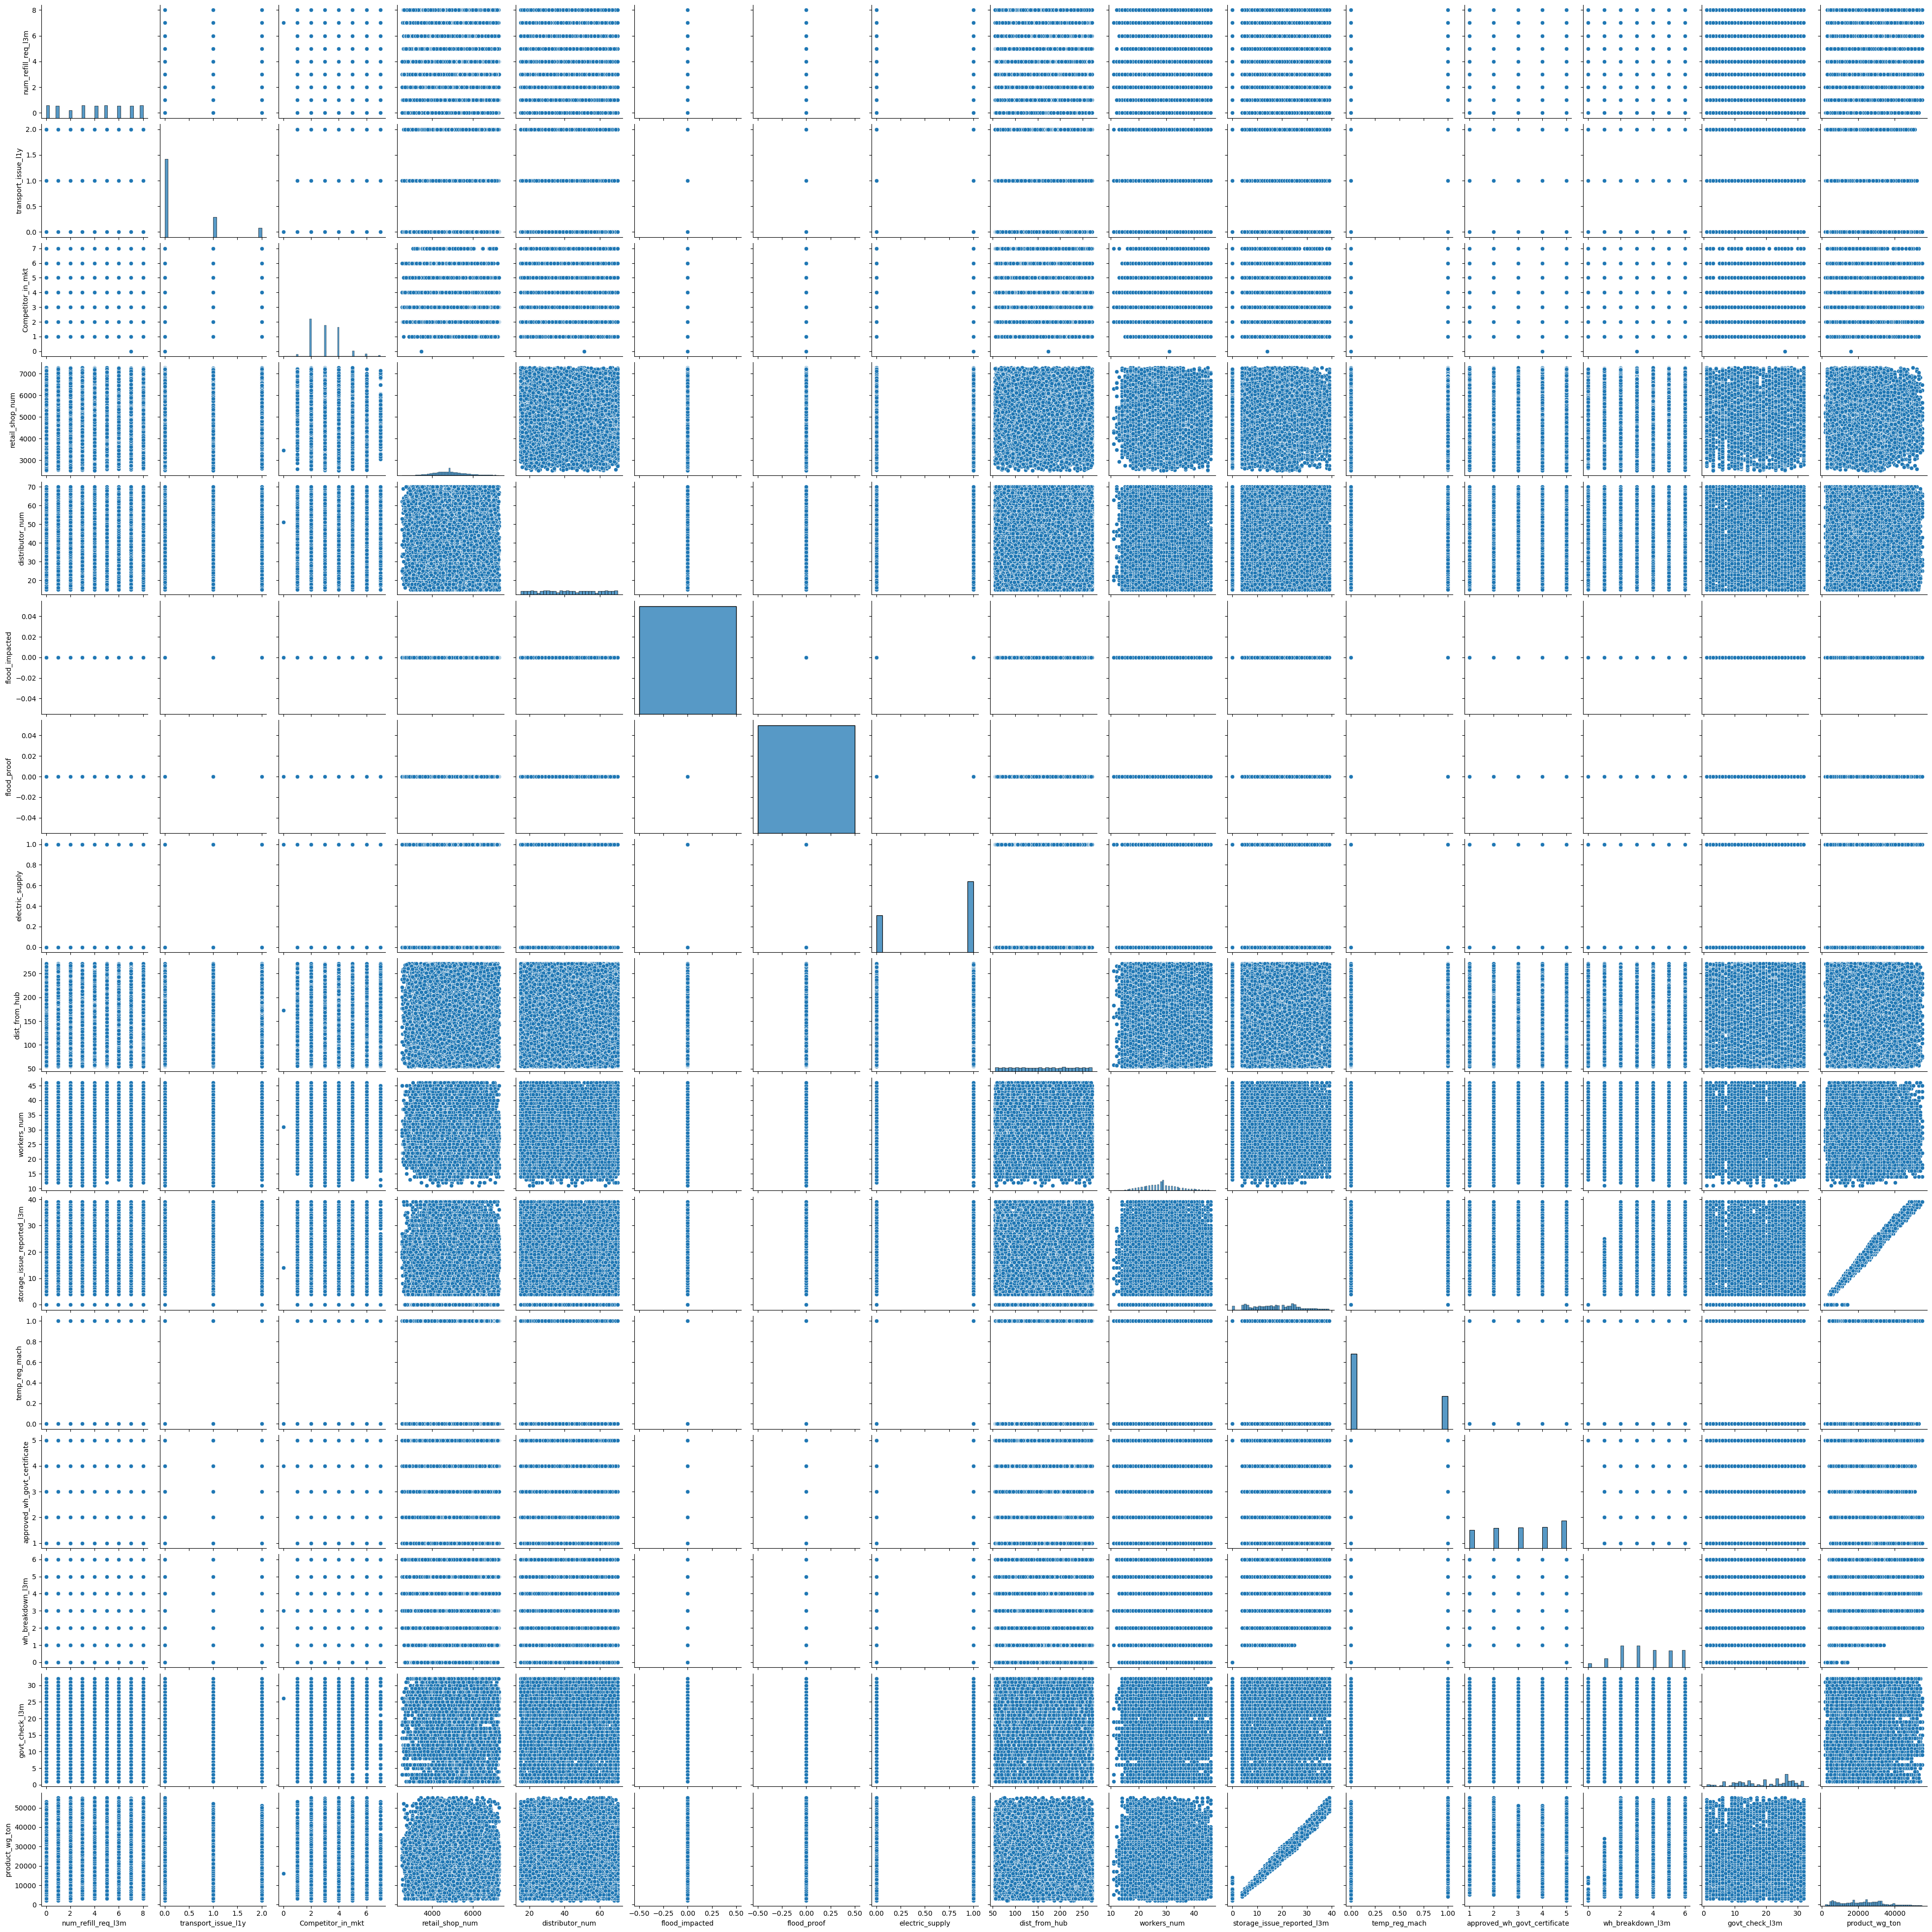

In [24]:
sns.pairplot(df_imputed, palette='red')

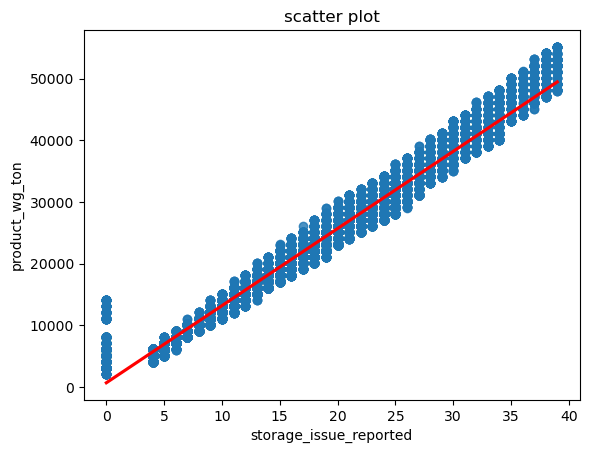

In [25]:
# Plot a scatter plot with a regression line
sns.regplot(x='storage_issue_reported_l3m', y='product_wg_ton', data=df_imputed, ci=None, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel('storage_issue_reported')
plt.ylabel('product_wg_ton')
plt.title('scatter plot')

# Show the plot
plt.show()

# we can conclude from this graph that if we face major report from a warehouse we shipped more product so that the product doesnt destroyed.

In [26]:
# now converting remaining the categorical values into numerical values using one hot encoding

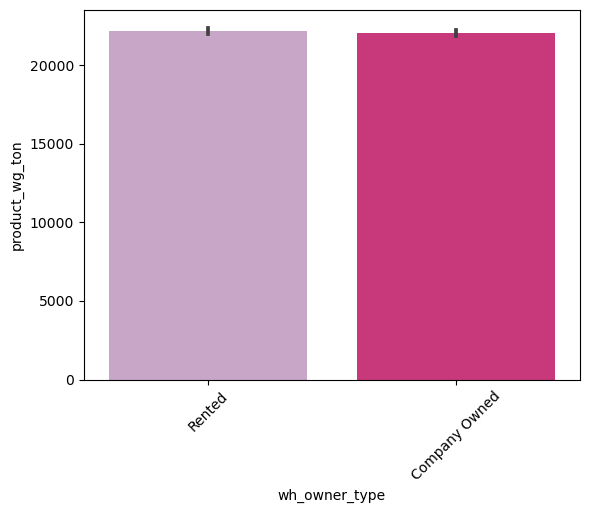

In [27]:
# comparison with owner type and target variable
# we clearly see it doesnt impact overall product shipping

sns.barplot(x='wh_owner_type',y='product_wg_ton',data=df_imputed,palette='PuRd')
plt.xticks(rotation = 45)
plt.show()

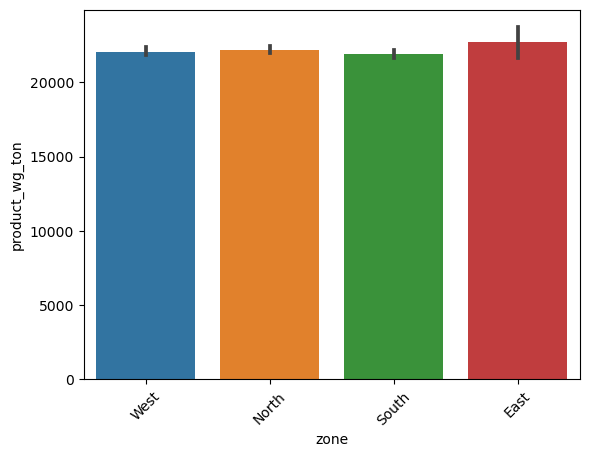

In [28]:
sns.barplot(x='zone',y='product_wg_ton',data=df_imputed)
plt.xticks(rotation = 45)
plt.show()

# in this graph east zone has more product shipped as compare with west,north,south

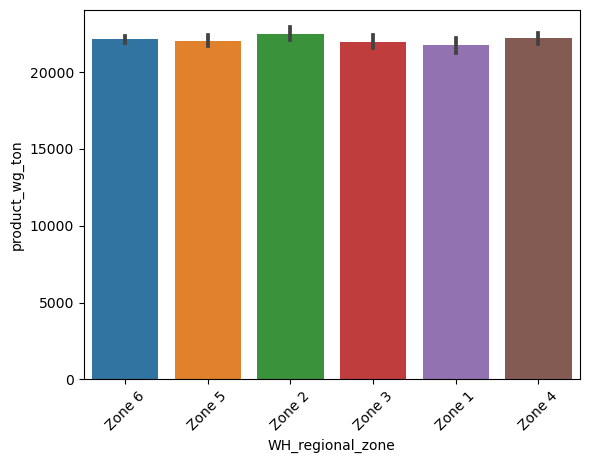

In [29]:
sns.barplot(x='WH_regional_zone',y='product_wg_ton',data=df_imputed)
plt.xticks(rotation = 45)
plt.show()

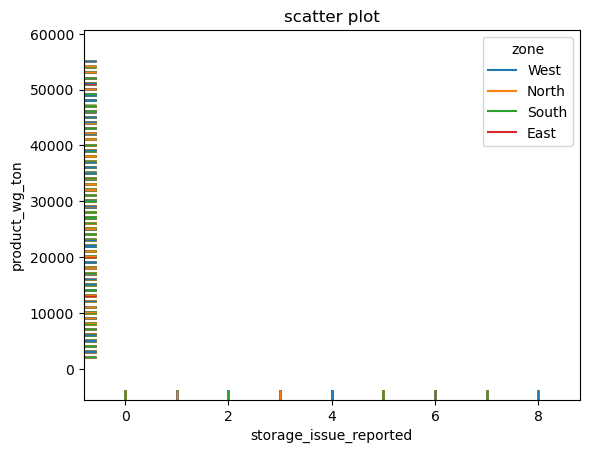

In [30]:
# Plot a scatter plot with a regression line
sns.rugplot(x='num_refill_req_l3m', y='product_wg_ton',hue='zone', data=df_imputed)

# Add labels and a title
plt.xlabel('storage_issue_reported')
plt.ylabel('product_wg_ton')
plt.title('scatter plot')

# Show the plot
plt.show()

# we can conclude from this graph that if we face major report from a warehouse we shipped more product so that the product doesnt destroyed.

In [31]:
def one_hot_encode(data):
    
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    
    # One-hot encode categorical columns
    one_hot_encoded = pd.get_dummies(data[categorical_columns],drop_first=True)
    
    # Concatenate one-hot encoded columns with numerical columns
    encoded_data = pd.concat([one_hot_encoded, data[numerical_columns]], axis=1)
    
    return encoded_data


In [32]:
categorical_columns = df_imputed.select_dtypes(include=['object']).columns

In [33]:
categorical_columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type'],
      dtype='object')

In [34]:
encoded_data = one_hot_encode(df_imputed)

In [35]:
encoded_data

Location_type_Urban  WH_capacity_size_Mid  WH_capacity_size_Small  \
0                        1                     0                       1   
1                        0                     0                       0   
2                        0                     1                       0   
3                        0                     1                       0   
4                        0                     0                       0   
...                    ...                   ...                     ...   
24995                    0                     0                       1   
24996                    0                     1                       0   
24997                    1                     0                       0   
24998                    0                     0                       1   
24999                    0                     1                       0   

       zone_North  zone_South  zone_West  WH_regional_zone_Zone 2  \
0               0           0          1                        0   
1               1           0          0                        0   
2               0           1          0                        1   
3               1           0          0                        0   
4               1           0          0                        0   
...           ...         ...        ...                      ...   
24995           1           0          0                        0   
24996           0           0          1                        1   
24997           0           1          0                        0   
24998           1           0          0                        0   
24999           0           0          1                        0   

       WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            1                        0   
4                            0                        0   
...                        ...                      ...   
24995                        0                        0   
24996                        0                        0   
24997                        0                        0   
24998                        0                        0   
24999                        0                        1   

       WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  wh_owner_type_Rented  \
0                            0                        1                     1   
1                            1                        0                     0   
2                            0                        0                     0   
3                            0                        0                     1   
4                            1                        0                     0   
...                        ...                      ...                   ...   
24995                        0                        0                     1   
24996                        0                        0                     0   
24997                        1                        0                     1   
24998                        0                        0                     1   
24999                        0                        0                     0   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                     3.0                  1.0                2.0   
1                     0.0                  0.0                4.0   
2                     1.0                  0.0                4.0   
3                     7.0                  0.0                2.0   
4                     3.0                  1.0                2.0   
...                   ...                  ...                ...   
24995                 3.0                  0.0                4.0   
24996                 6.0      

In [60]:
encoded_data['approved_wh_govt_certificate'].unique()

array([2., 1., 5., 3., 4.])

<Axes: >

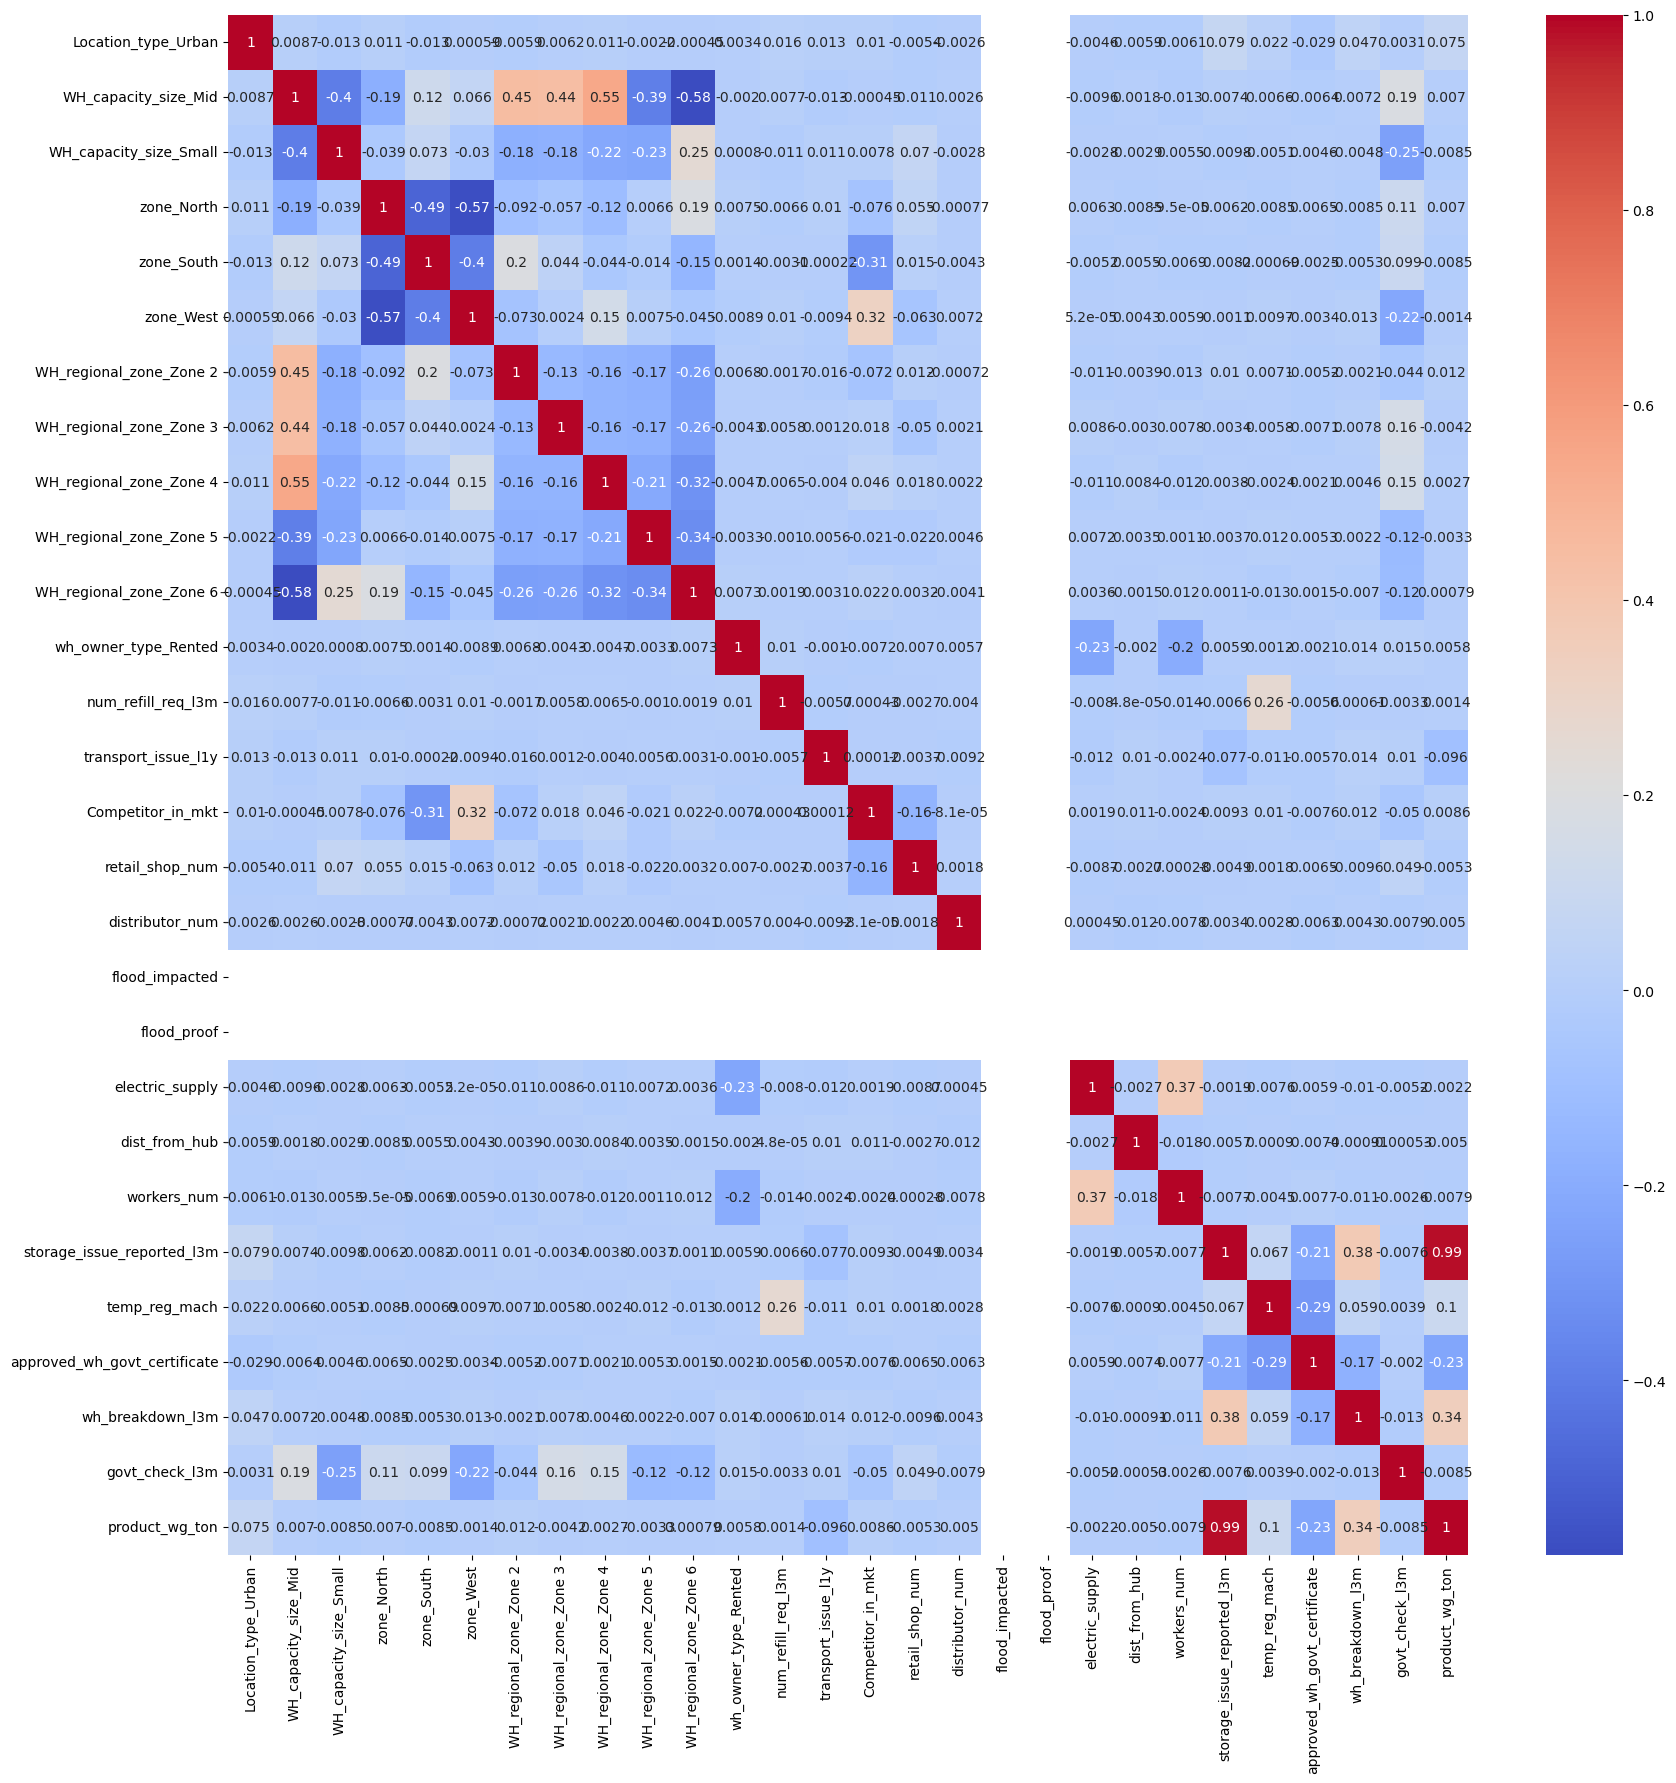

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')

In [37]:
encoded_data['flood_proof'].unique()

array([0.])

In [38]:
#dropping the column flood_proof and flood_impacted as there value is zero thus it doesnt impact anything in the target value
columns_to_drop = ['flood_impacted', 'flood_proof','distributor_num']
encoded_data = encoded_data.drop(columns=columns_to_drop)


In [39]:
encoded_data.drop(['retail_shop_num'],axis=1,inplace=True)

<Axes: >

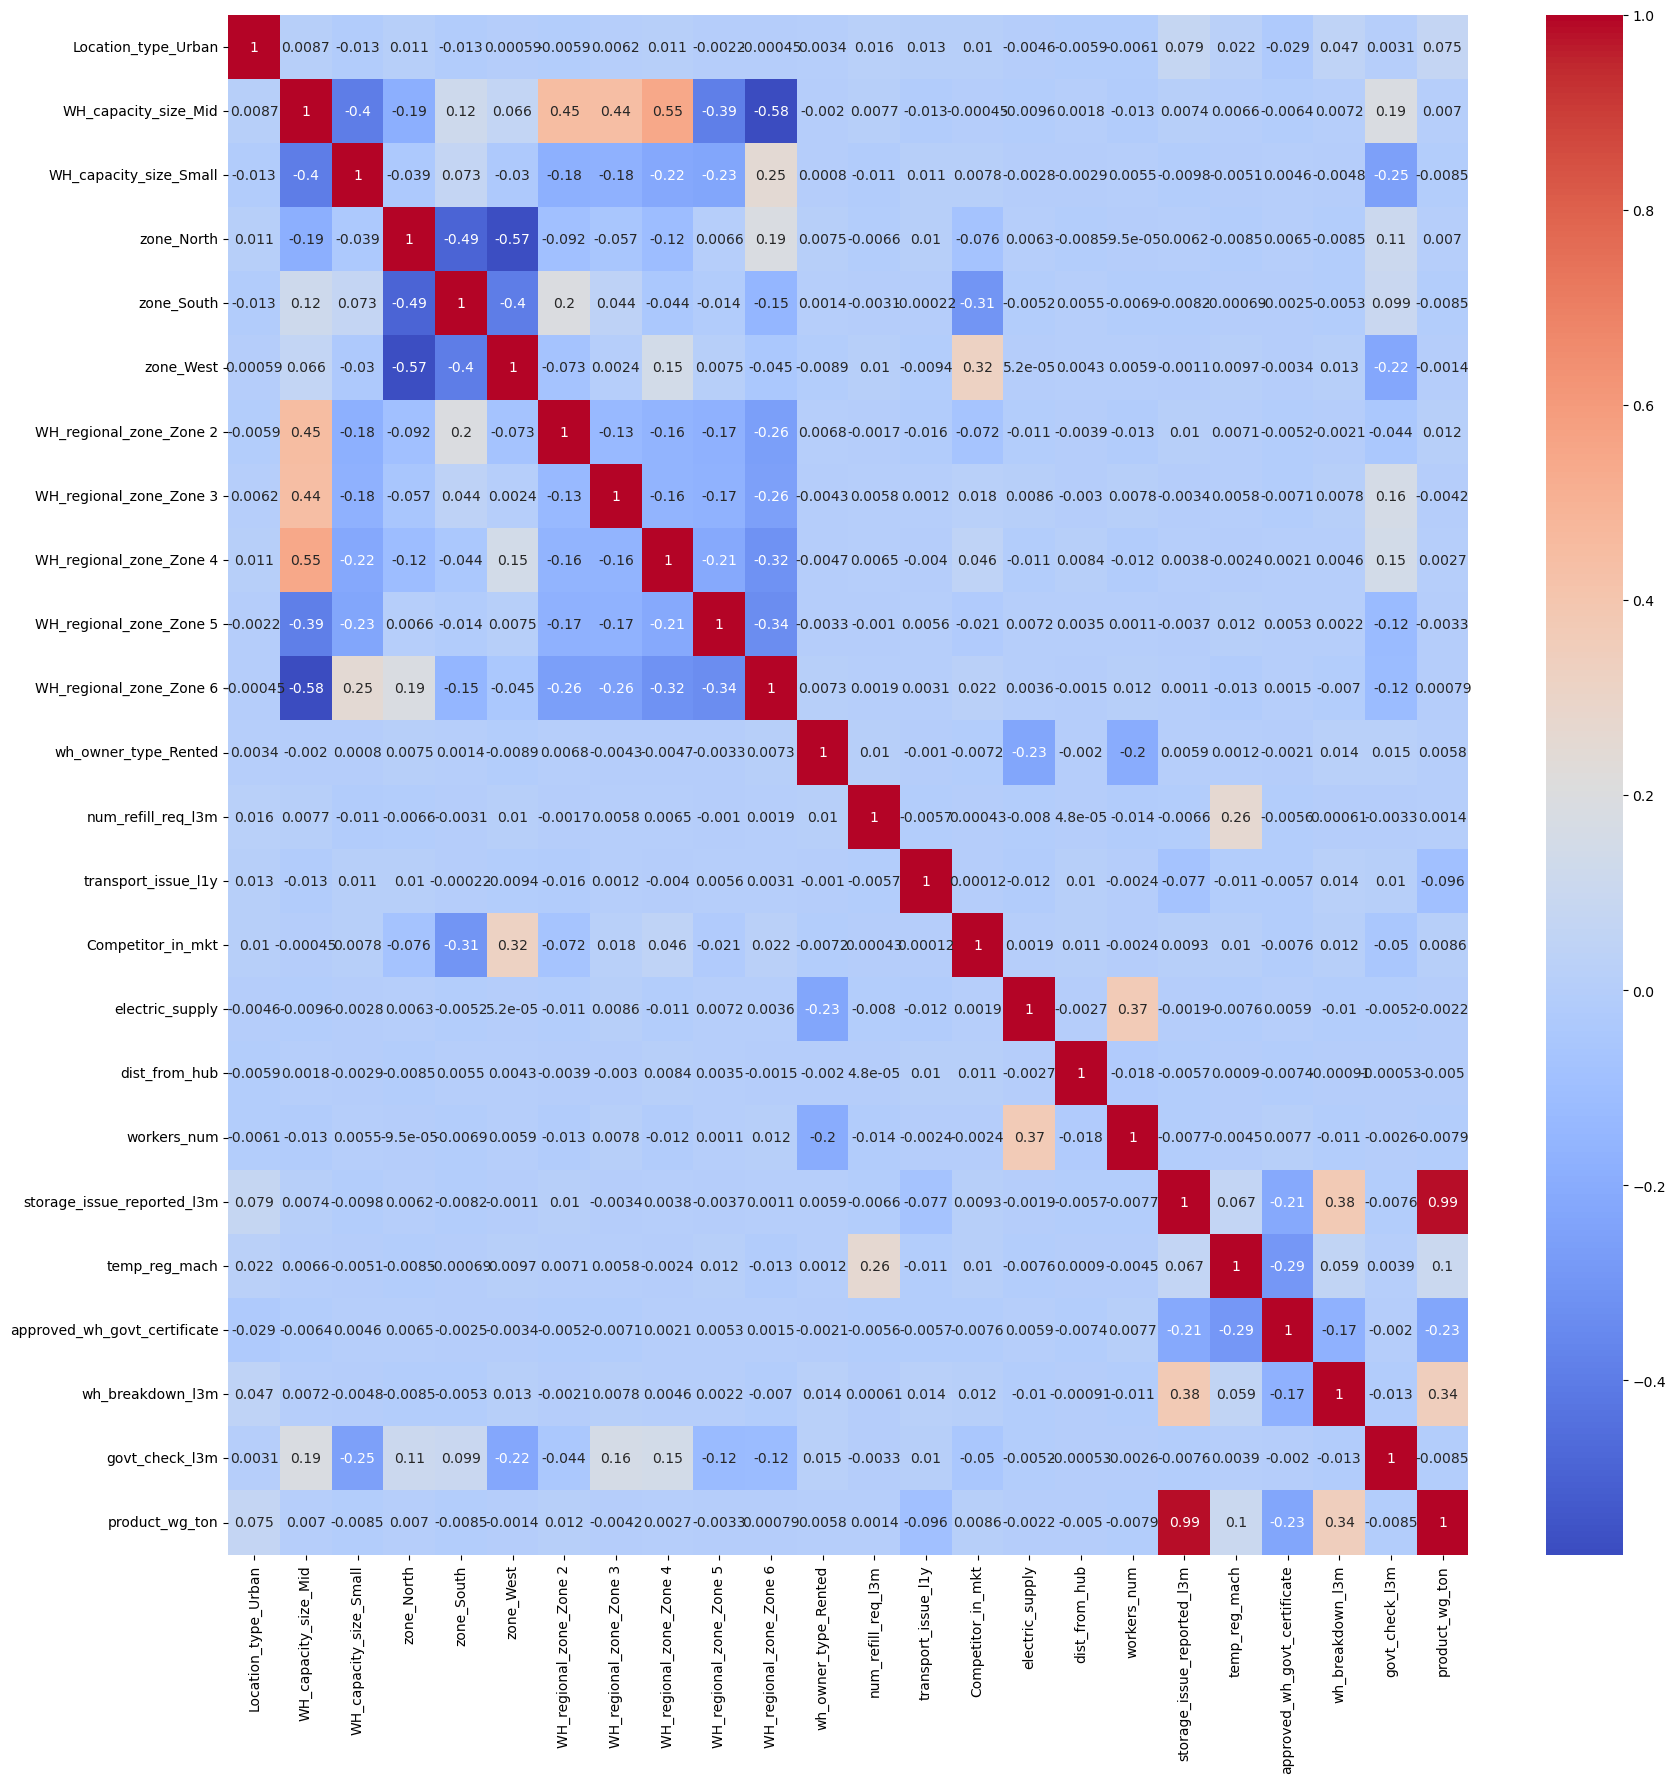

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')

In [41]:
encoded_data1 = encoded_data.copy()

In [42]:
# clearly see that storage_issue_reported_l3m show highest corelation with the target variable hence we have to drop this column
encoded_data1.drop(['storage_issue_reported_l3m'],axis=1,inplace=True)

In [43]:
encoded_data1

Location_type_Urban  WH_capacity_size_Mid  WH_capacity_size_Small  \
0                        1                     0                       1   
1                        0                     0                       0   
2                        0                     1                       0   
3                        0                     1                       0   
4                        0                     0                       0   
...                    ...                   ...                     ...   
24995                    0                     0                       1   
24996                    0                     1                       0   
24997                    1                     0                       0   
24998                    0                     0                       1   
24999                    0                     1                       0   

       zone_North  zone_South  zone_West  WH_regional_zone_Zone 2  \
0               0           0          1                        0   
1               1           0          0                        0   
2               0           1          0                        1   
3               1           0          0                        0   
4               1           0          0                        0   
...           ...         ...        ...                      ...   
24995           1           0          0                        0   
24996           0           0          1                        1   
24997           0           1          0                        0   
24998           1           0          0                        0   
24999           0           0          1                        0   

       WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            1                        0   
4                            0                        0   
...                        ...                      ...   
24995                        0                        0   
24996                        0                        0   
24997                        0                        0   
24998                        0                        0   
24999                        0                        1   

       WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  wh_owner_type_Rented  \
0                            0                        1                     1   
1                            1                        0                     0   
2                            0                        0                     0   
3                            0                        0                     1   
4                            1                        0                     0   
...                        ...                      ...                   ...   
24995                        0                        0                     1   
24996                        0                        0                     0   
24997                        1                        0                     1   
24998                        0                        0                     1   
24999                        0                        0                     0   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                     3.0                  1.0                2.0   
1                     0.0                  0.0                4.0   
2                     1.0                  0.0                4.0   
3                     7.0                  0.0                2.0   
4                     3.0                  1.0                2.0   
...                   ...                  ...                ...   
24995                 3.0                  0.0                4.0   
24996                 6.0      

<Axes: >

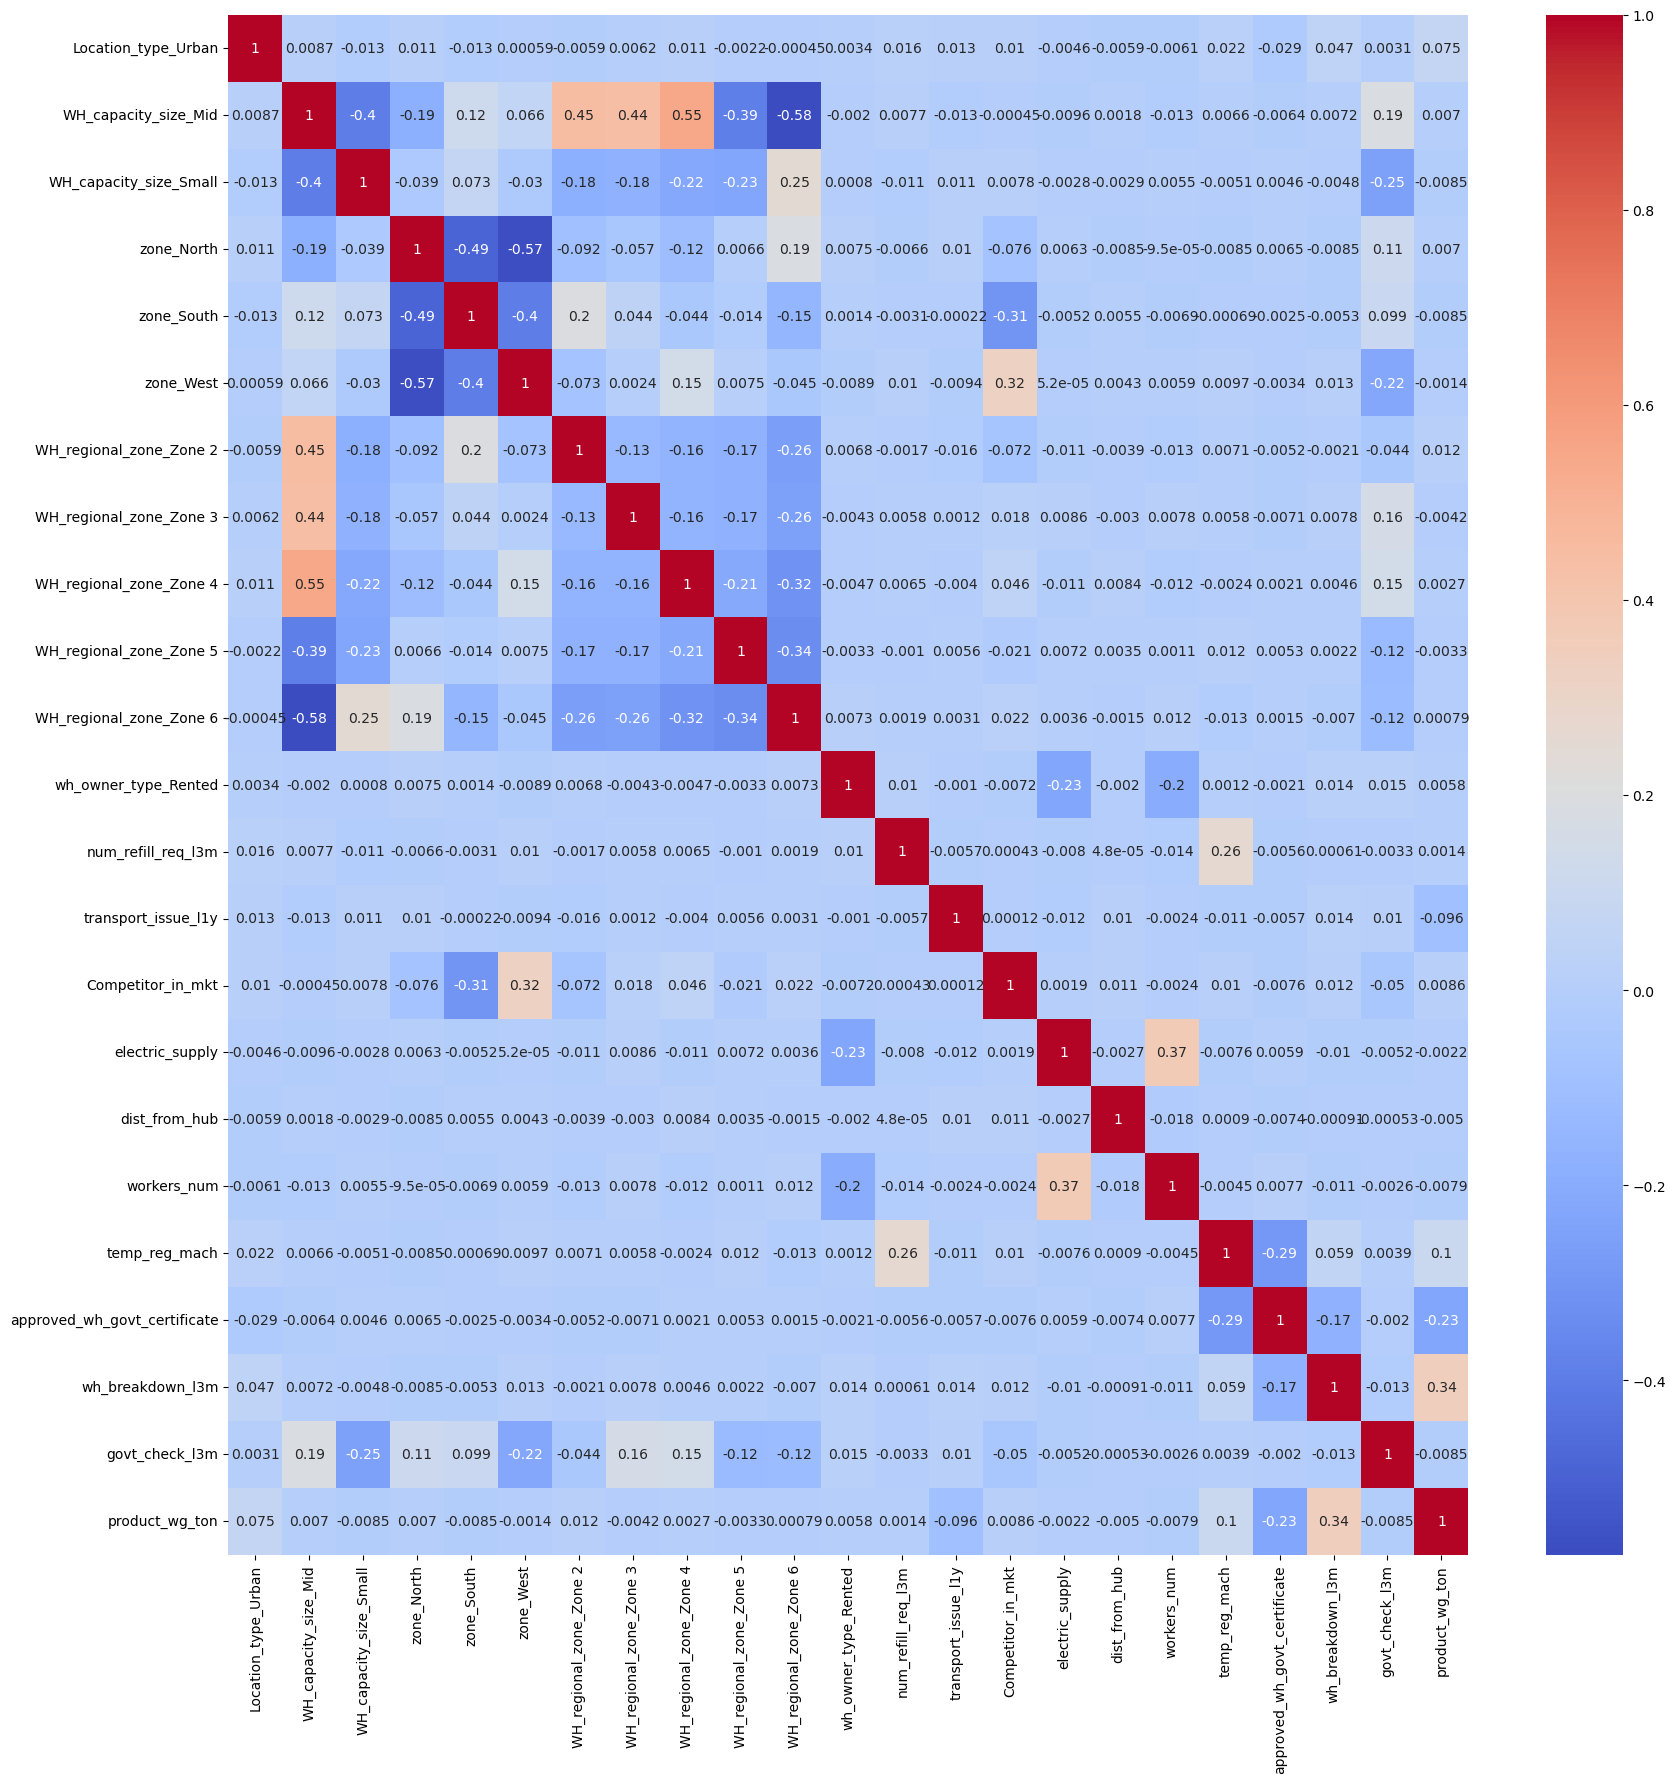

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(encoded_data1.corr(), annot=True, cmap='coolwarm')

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = encoded_data.drop(['product_wg_ton'],axis=1)
Y = encoded_data['product_wg_ton']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the sizes of the resulting sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 20000
Testing set size: 5000


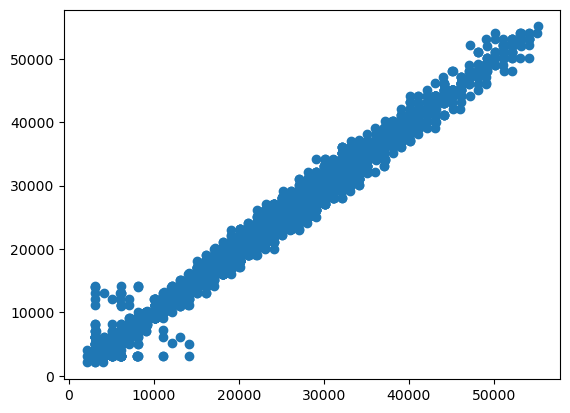

In [50]:
plt.scatter(y_test, y_pred_Dt)

In [51]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [52]:
regressor1 = DecisionTreeRegressor(random_state=42)
regressor2 = LinearRegression()
regressor3 = RandomForestRegressor(random_state=42)

# Create a VotingRegressor
voting_reg = VotingRegressor(estimators=[('dt', regressor1), ('lr', regressor2), ('rf', regressor3)])

# Train the model
voting_reg.fit(X_train, y_train)

# Make predictions
voting_pred = voting_reg.predict(X_test)

# Evaluate mean squared error
r2s = r2_score(y_test, voting_pred)

print(f'Voting Regressor R2 Score: {r2s:.2f}')

Voting Regressor Mean Squared Error: 0.99


In [53]:
# Define individual regressors
regressor1 = DecisionTreeRegressor(random_state=42)
regressor2 = LinearRegression()
regressor3 = RandomForestRegressor(random_state=42)

for regressor in [regressor1, regressor2, regressor3]:
    scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=5)
    r2 = scores.mean()
    print(f'{regressor.__class__.__name__} R2 Score: {r2:.2f}')

# Evaluate Voting Regressor using R2 score
voting_scores = cross_val_score(voting_reg, X_train, y_train, scoring='r2', cv=5)
voting_r2 = voting_scores.mean()
print(f'Voting Regressor R2 Score: {voting_r2:.2f}')

DecisionTreeRegressor R2 Score: 0.99
LinearRegression R2 Score: 0.98
RandomForestRegressor R2 Score: 0.99
Voting Regressor R2 Score: 0.99


In [48]:
# So we choose the First model through voting i.e. DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
model_Dt = DecisionTreeRegressor()

# Fit the model to the data
model_Dt.fit(X_train, y_train)

# Make predictions
y_pred_Dt = model_Dt.predict(X_test)

In [49]:
r2_DT = r2_score(y_test, y_pred_Dt)
r2_DT

0.985470103899896

                         Feature  Importance
18    storage_issue_reported_l3m    0.982537
20  approved_wh_govt_certificate    0.009103
16                 dist_from_hub    0.001433
17                   workers_num    0.001071
19                 temp_reg_mach    0.000857
12            num_refill_req_l3m    0.000837
22                govt_check_l3m    0.000806
13           transport_issue_l1y    0.000644
21              wh_breakdown_l3m    0.000635
14             Competitor_in_mkt    0.000563
3                     zone_North    0.000172
15               electric_supply    0.000169
11          wh_owner_type_Rented    0.000161
5                      zone_West    0.000151
10       WH_regional_zone_Zone 6    0.000146
2         WH_capacity_size_Small    0.000110
4                     zone_South    0.000105
8        WH_regional_zone_Zone 4    0.000100
9        WH_regional_zone_Zone 5    0.000097
1           WH_capacity_size_Mid    0.000087
0            Location_type_Urban    0.000074
7        W

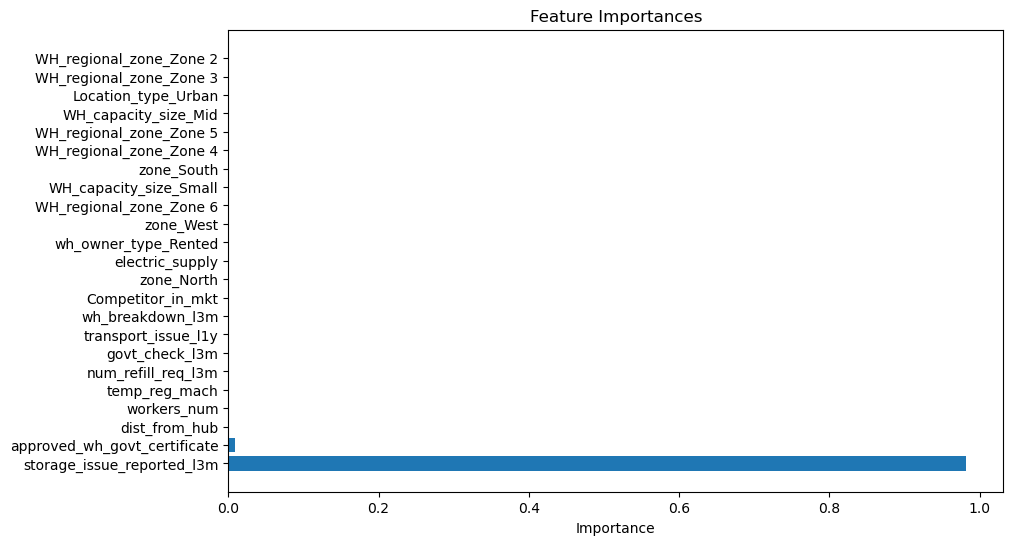

In [54]:
# Checking the most important feature
feature_importances = model_Dt.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [55]:
encoded_data.head(5)

Location_type_Urban  WH_capacity_size_Mid  WH_capacity_size_Small  \
0                    1                     0                       1   
1                    0                     0                       0   
2                    0                     1                       0   
3                    0                     1                       0   
4                    0                     0                       0   

   zone_North  zone_South  zone_West  WH_regional_zone_Zone 2  \
0           0           0          1                        0   
1           1           0          0                        0   
2           0           1          0                        1   
3           1           0          0                        0   
4           1           0          0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        1   

   WH_regional_zone_Zone 6  wh_owner_type_Rented  num_refill_req_l3m  \
0                        1                     1                 3.0   
1                        0                     0                 0.0   
2                        0                     0                 1.0   
3                        0                     1                 7.0   
4                        0                     0                 3.0   

   transport_issue_l1y  Competitor_in_mkt  electric_supply  dist_from_hub  \
0                  1.0                2.0              1.0           91.0   
1                  0.0                4.0              1.0          210.0   
2                  0.0                4.0              0.0          161.0   
3                  0.0                2.0              0.0          103.0   
4                  1.0                2.0              1.0          112.0   

   workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0                        13.0            0.0   
1         31.0                         4.0            0.0   
2         37.0                        17.0            0.0   
3         21.0                        17.0            1.0   
4         25.0                        18.0            0.0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                           2.0               5.0            15.0   
1                           2.0               3.0            17.0   
2                           2.0               6.0            22.0   
3                           1.0               3.0            27.0   
4                           5.0               6.0            24.0   

   product_wg_ton  
0         17115.0  
1          5074.0  
2         23137.0  
3         22115.0  
4         24071.0

In [56]:
df_imputed.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [57]:
df_imputed.head(3)

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                 3.0   
1         Rural            Large  North           Zone 5                 0.0   
2         Rural              Mid  South           Zone 2                 1.0   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                  1.0                2.0           4651.0         Rented   
1                  0.0                4.0           6217.0  Company Owned   
2                  0.0                4.0           4306.0  Company Owned   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0             24.0             0.0          0.0              1.0   
1             47.0             0.0          0.0              1.0   
2             64.0             0.0          0.0              0.0   

   dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0           91.0         29.0                        13.0            0.0   
1          210.0         31.0                         4.0            0.0   
2          161.0         37.0                        17.0            0.0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                           2.0               5.0            15.0   
1                           2.0               3.0            17.0   
2                           2.0               6.0            22.0   

   product_wg_ton  
0         17115.0  
1          5074.0  
2         23137.0

SyntaxError: invalid syntax (717377518.py, line 1)